In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "NFLX.xlsx" 
df = pd.read_excel(file_path)
print(df.head())

   Day  Month  Year        Open        High         Low       Close    Volume
0    5      2  2018  262.000000  267.899994  250.029999  254.259995  11896100
1    6      2  2018  247.699997  266.700012  245.000000  265.720001  12595800
2    7      2  2018  266.579987  272.450012  264.329987  264.559998   8981500
3    8      2  2018  267.079987  267.619995  250.000000  250.100006   9306700
4    9      2  2018  253.850006  255.800003  236.110001  249.470001  16906900


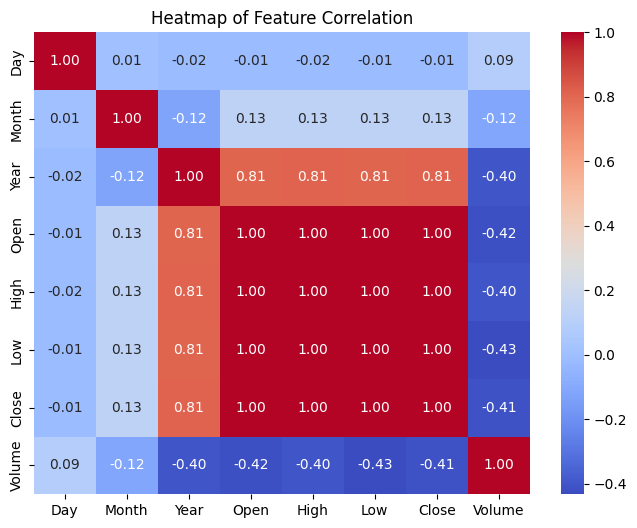

In [2]:
correlation = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlation')
plt.show()

In [10]:
df.drop(columns=['Day'], inplace=True)
print(df.shape)
X = df.drop(columns=['Close']) 
y = df['Close']  
print(X.shape)
print(y.shape)

(1009, 7)
(1009, 6)
(1009,)


In [22]:
print("Order of features in X:", X.columns.tolist())

Order of features in X: ['Month', 'Year', 'Open', 'High', 'Low', 'Volume']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(807, 6)
(202, 6)
(807,)
(202,)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import Ridge, Lasso, SGDRegressor

def train_and_evaluate(model,X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    print(f"{model.__class__.__name__}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print('-' * 40)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),      
    'Lasso Regression': Lasso(alpha=0.01),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='adaptive', eta0=0.01)     
}

for model in models.values():
    model.fit(X_train_scaled, y_train)

for name, model in models.items():
    train_and_evaluate(model,X_test_scaled, y_test)


LinearRegression:
Mean Absolute Error (MAE): 2.87
Mean Squared Error (MSE): 16.25
Root Mean Squared Error (RMSE): 4.03
R² Score: 1.00
----------------------------------------
Ridge:
Mean Absolute Error (MAE): 2.88
Mean Squared Error (MSE): 15.79
Root Mean Squared Error (RMSE): 3.97
R² Score: 1.00
----------------------------------------
Lasso:
Mean Absolute Error (MAE): 2.90
Mean Squared Error (MSE): 16.40
Root Mean Squared Error (RMSE): 4.05
R² Score: 1.00
----------------------------------------
SGDRegressor:
Mean Absolute Error (MAE): 3.04
Mean Squared Error (MSE): 16.37
Root Mean Squared Error (RMSE): 4.05
R² Score: 1.00
----------------------------------------


c:\Users\ALKAmel.TEC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.637e+03, tolerance: 9.463e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox

def predict():
    try:
        
        inputs = [float(entry.get()) for entry in entries]

        selected_model = model_choice.get()
        model = models[selected_model]

        inputs_scaled = scaler.transform([inputs])

        prediction = model.predict(inputs_scaled)[0]

        messagebox.showinfo("Prediction Result", f"Predicted Close Price: {prediction:.2f} $")
    except Exception as e:
        messagebox.showerror("Input Error", str(e))


root = tk.Tk()
root.title("Stock Price Prediction")

labels = ['Month', 'Year', 'Open', 'High', 'Low', 'Volume']
entries = []

for label in labels:
    frame = tk.Frame(root)
    frame.pack(pady=5)
    tk.Label(frame, text=label).pack(side=tk.LEFT)
    entry = tk.Entry(frame)
    entry.pack(side=tk.RIGHT)
    entries.append(entry)


model_choice = ttk.Combobox(root, values=list(models.keys()))
model_choice.pack(pady=10)
model_choice.set('Linear Regression')

predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.pack(pady=10)

root.mainloop()


c:\Users\ALKAmel.TEC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ALKAmel.TEC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ALKAmel.TEC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ALKAmel.TEC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ALKAmel.TEC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid f